In [2]:
# Import necessary libraries. 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import category_encoders as ce


In [3]:
# Inspect the sheet names in the Excel file
excel_file = pd.ExcelFile('Spotify_data.xlsx')
print("Available sheet names:", excel_file.sheet_names)

# Import the dataset using the correct sheet name
df = pd.read_excel('Spotify_data.xlsx', sheet_name=excel_file.sheet_names[0])  # Replace index 0 with the correct sheet index or name

Available sheet names: ['Sheet1']


In [4]:
df.head()

,Age,Gender,spotify_usage_period,spotify_listening_device,spotify_subscription_plan,premium_sub_willingness,preffered_premium_plan,preferred_listening_content,fav_music_genre,music_time_slot,music_Influencial_mood,music_lis_frequency,music_expl_method,music_recc_rating,pod_lis_frequency,fav_pod_genre,preffered_pod_format,pod_host_preference,preffered_pod_duration,pod_variety_satisfaction
0,20-35,Female,More than 2 years,Smart speakers or voice assistants,Free (ad-supported),Yes,Family Plan-Rs 179/month,Podcast,Melody,Night,Sadness or melancholy,leisure time,Playlists,3,Daily,Comedy,Interview,Both,Both,Ok
1,12-20,Male,More than 2 years,Computer or laptop,Free (ad-supported),Yes,Individual Plan- Rs 119/ month,Podcast,Rap,Afternoon,Social gatherings or parties,Workout session,Playlists,2,Several times a week,Comedy,Interview,Both,NaN,Satisfied
2,35-60,Others,6 months to 1 year,Smart speakers or voice assistants,Free (ad-supported),Yes,Student Plan-Rs 59/month,Podcast,Pop,Night,Relaxation and stress relief,"Study Hours, While Traveling",Playlists,4,Once a week,Sports,Interview,NaN,Both,Satisfied
3,20-35,Female,1 year to 2 years,"Smartphone, Smart speakers or voice assistants",Free (ad-supported),No,NaN,Music,Melody,Night,"Relaxation and stress relief, Social gathering...","Office hours, Workout session, leisure time","recommendations, Playlists",4,Never,NaN,NaN,NaN,NaN,Ok
4,20-35,Female,1 year to 2 years,Smartphone,Free (ad-supported),No,NaN,Music,Melody,Night,Relaxation and stress relief,leisure time,"recommendations, Playlists",4,Rarely,Lifestyle and Health,Story telling,Well known individuals,Both,Ok


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Age                          520 non-null    object
 1   Gender                       520 non-null    object
 2   spotify_usage_period         520 non-null    object
 3   spotify_listening_device     520 non-null    object
 4   spotify_subscription_plan    520 non-null    object
 5   premium_sub_willingness      520 non-null    object
 6   preffered_premium_plan       312 non-null    object
 7   preferred_listening_content  520 non-null    object
 8   fav_music_genre              520 non-null    object
 9   music_time_slot              520 non-null    object
 10  music_Influencial_mood       520 non-null    object
 11  music_lis_frequency          520 non-null    object
 12  music_expl_method            520 non-null    object
 13  music_recc_rating            520 no

Missing values per column:
 Age                              0
Gender                           0
spotify_usage_period             0
spotify_listening_device         0
spotify_subscription_plan        0
premium_sub_willingness          0
preffered_premium_plan         208
preferred_listening_content      0
fav_music_genre                  0
music_time_slot                  0
music_Influencial_mood           0
music_lis_frequency              0
music_expl_method                0
music_recc_rating                0
pod_lis_frequency                0
fav_pod_genre                  148
preffered_pod_format           140
pod_host_preference            141
preffered_pod_duration         129
pod_variety_satisfaction         0
dtype: int64


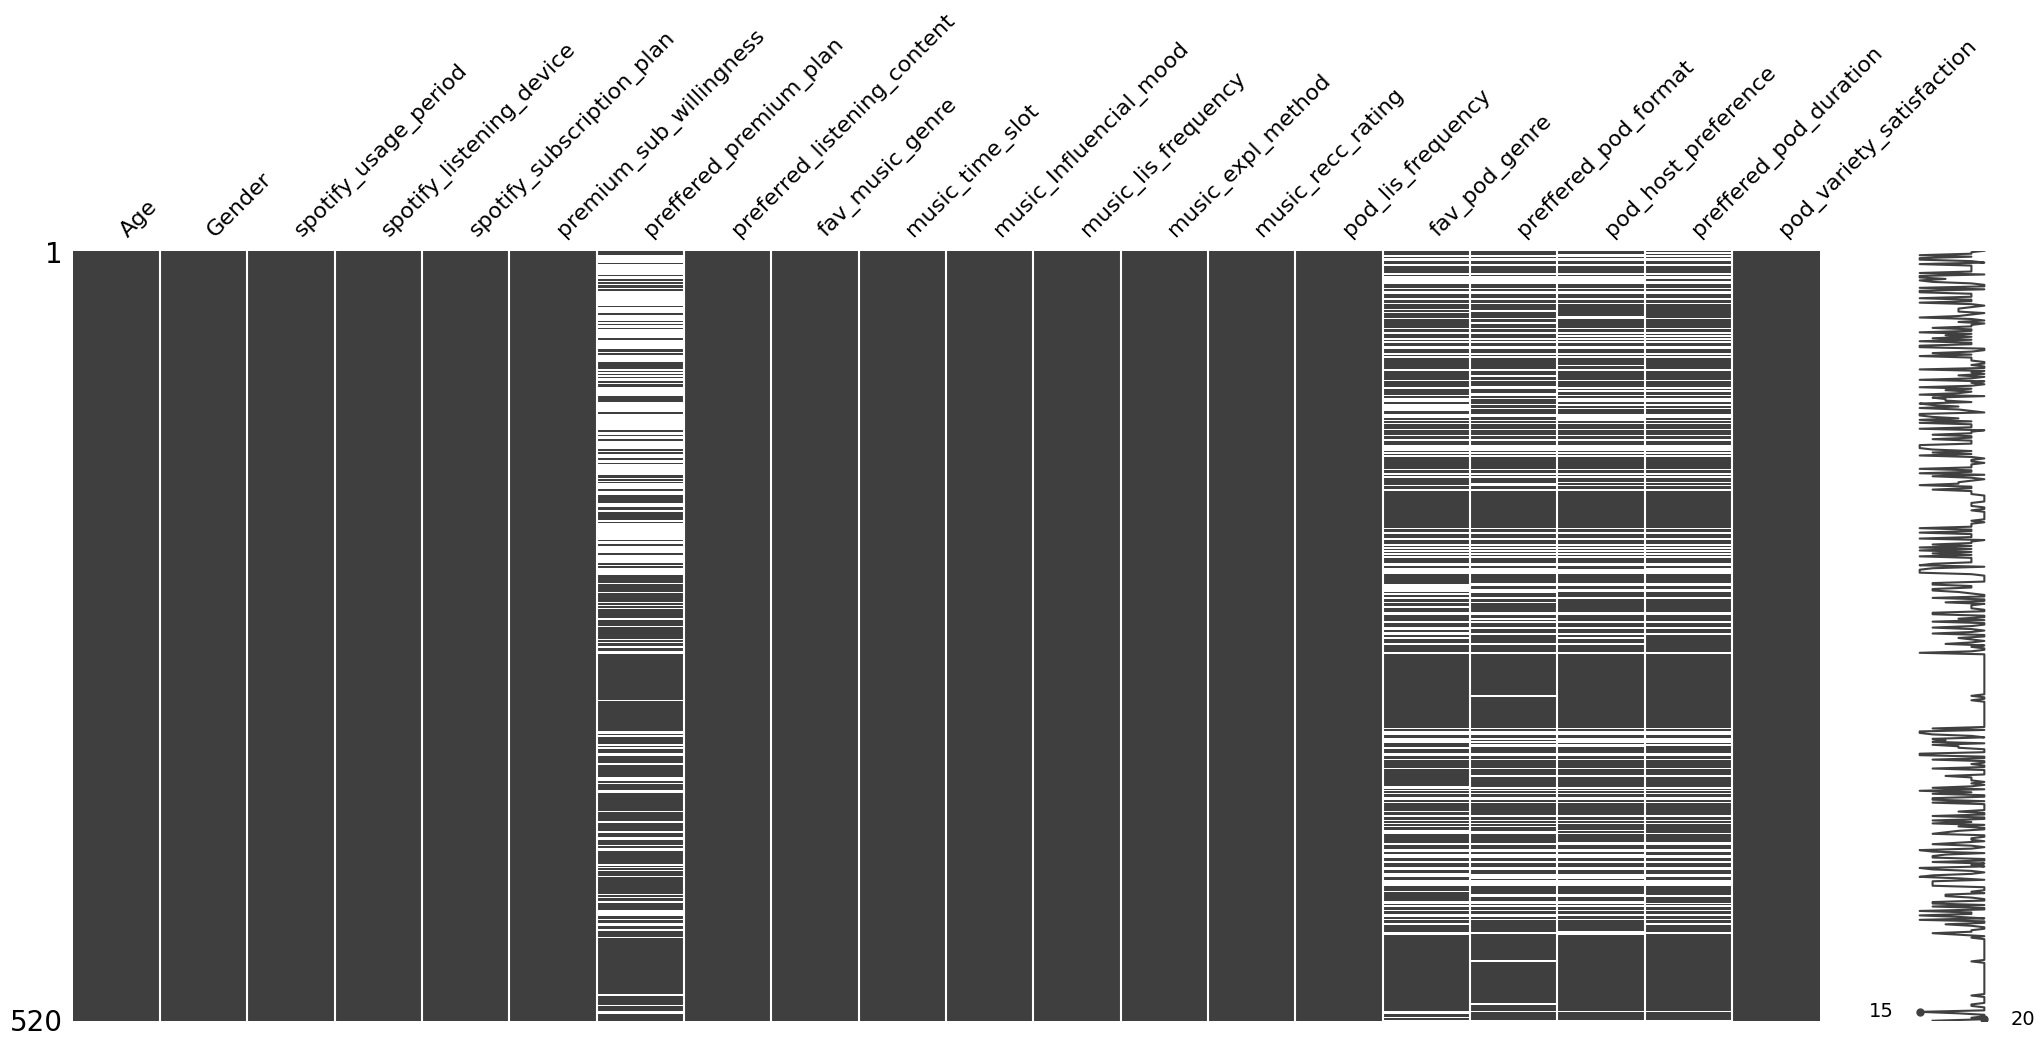

In [6]:
# Check missing values
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)

# Visualize missing data (optional, nice looking)
import missingno as msno
msno.matrix(df)
plt.show()

In [7]:
# Fill missing values with 'Unknown'
df_cleaned = df.fillna('Unknown')

# Check
df_cleaned.isnull().sum()


Age                            0
Gender                         0
spotify_usage_period           0
spotify_listening_device       0
spotify_subscription_plan      0
premium_sub_willingness        0
preffered_premium_plan         0
preferred_listening_content    0
fav_music_genre                0
music_time_slot                0
music_Influencial_mood         0
music_lis_frequency            0
music_expl_method              0
music_recc_rating              0
pod_lis_frequency              0
fav_pod_genre                  0
preffered_pod_format           0
pod_host_preference            0
preffered_pod_duration         0
pod_variety_satisfaction       0
dtype: int64

In [8]:
# Check and drop duplicate rows
dupes = df_cleaned[df_cleaned.duplicated()]
print(f"Duplicate rows: {len(dupes)}")

if not dupes.empty:
    print(dupes)
    df_cleaned = df_cleaned.drop_duplicates()
    print("Duplicates dropped.")
    print("Same across duplicates:", [col for col in dupes.columns if dupes[col].nunique() == 1])
else:
    print("No duplicates found.")


Duplicate rows: 1
       Age  Gender spotify_usage_period spotify_listening_device  \
194  20-35  Female    1 year to 2 years               Smartphone   

    spotify_subscription_plan premium_sub_willingness preffered_premium_plan  \
194       Free (ad-supported)                      No                Unknown   

    preferred_listening_content fav_music_genre music_time_slot  \
194                       Music          Melody           Night   

           music_Influencial_mood            music_lis_frequency  \
194  Relaxation and stress relief  While Traveling, leisure time   

    music_expl_method  music_recc_rating pod_lis_frequency fav_pod_genre  \
194   recommendations                  4             Never       Unknown   

    preffered_pod_format pod_host_preference preffered_pod_duration  \
194              Unknown             Unknown                Unknown   

    pod_variety_satisfaction  
194                       Ok  
Duplicates dropped.
Same across duplicates: ['Age', 'G

In [9]:
numeric_cols = df_cleaned.select_dtypes(include=[np.number]).columns
print("Numeric columns:", numeric_cols)

Numeric columns: Index(['music_recc_rating'], dtype='object')


In [10]:
#changing the data type of 'music_recc_rating' to categorical
df['music_recc_rating'] = pd.Categorical(df['music_recc_rating'], 
                                          categories=[1, 2, 3, 4, 5], 
                                          ordered=True)

In [11]:
# Check unique values in each column
for col in df_cleaned.columns:
    unique_vals = df_cleaned[col].unique()
    print(f"\nColumn: {col}")
    print(f"Unique values ({len(unique_vals)}): {unique_vals}")



Column: Age
Unique values (5): ['20-35' '12-20' '35-60' '6-12' '60+']

Column: Gender
Unique values (3): ['Female' 'Male' 'Others']

Column: spotify_usage_period
Unique values (4): ['More than 2 years' '6 months to 1 year' '1 year to 2 years'
 'Less than 6 months']

Column: spotify_listening_device
Unique values (15): ['Smart speakers or voice assistants' 'Computer or laptop'
 'Smartphone, Smart speakers or voice assistants' 'Smartphone'
 'Smartphone, Computer or laptop'
 'Smartphone, Computer or laptop, Smart speakers or voice assistants'
 'Smartphone, Wearable devices'
 'Smartphone, Computer or laptop, Wearable devices'
 'Computer or laptop, Wearable devices'
 'Smartphone, Computer or laptop, Smart speakers or voice assistants, Wearable devices'
 'Wearable devices'
 'Smartphone, Smart speakers or voice assistants, Wearable devices'
 'Computer or laptop, Smart speakers or voice assistants'
 'Computer or laptop, Smart speakers or voice assistants, Wearable devices'
 'Smart speakers or

In [12]:
# Set the minimum frequency threshold as a percentage
min_percentage = 0.01  # e.g., 0.01 for 1%

# Loop through all object or categorical columns
for col in df_cleaned.select_dtypes(include=['object', 'category']).columns:
    freq = df_cleaned[col].value_counts()
    total_count = len(df_cleaned)  
    min_count = int(total_count * min_percentage)  
    rare_vals = freq[freq < min_count].index
    print(f"Rare categories in column '{col}' (<{min_percentage * 100}%): {list(rare_vals)}")  
    df_cleaned = df_cleaned[~df_cleaned[col].isin(rare_vals)]  

print("Rare categories removed.")

Rare categories in column 'Age' (<1.0%): ['6-12', '60+']
Rare categories in column 'Gender' (<1.0%): []
Rare categories in column 'spotify_usage_period' (<1.0%): []
Rare categories in column 'spotify_listening_device' (<1.0%): ['Computer or laptop, Smart speakers or voice assistants, Wearable devices', 'Smart speakers or voice assistants, Wearable devices']
Rare categories in column 'spotify_subscription_plan' (<1.0%): []
Rare categories in column 'premium_sub_willingness' (<1.0%): []
Rare categories in column 'preffered_premium_plan' (<1.0%): []
Rare categories in column 'preferred_listening_content' (<1.0%): []
Rare categories in column 'fav_music_genre' (<1.0%): ['Rock', 'Kpop', 'Classical & melody, dance', 'Old songs', 'trending songs random']
Rare categories in column 'music_time_slot' (<1.0%): []
Rare categories in column 'music_Influencial_mood' (<1.0%): ['Uplifting and motivational, Social gatherings or parties', 'Sadness or melancholy, Social gatherings or parties']
Rare categ

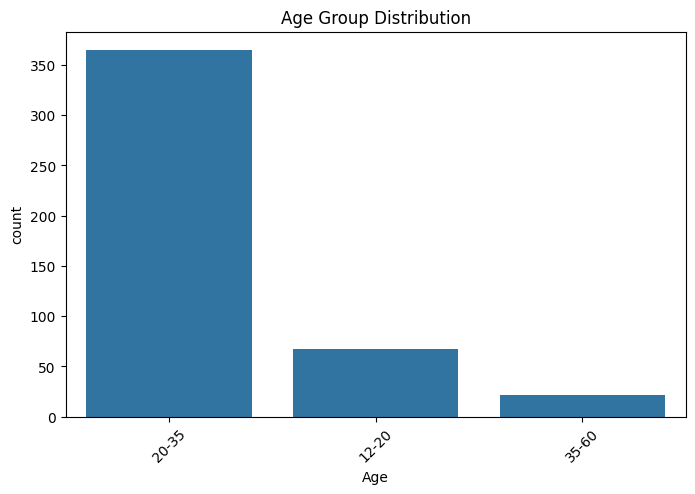

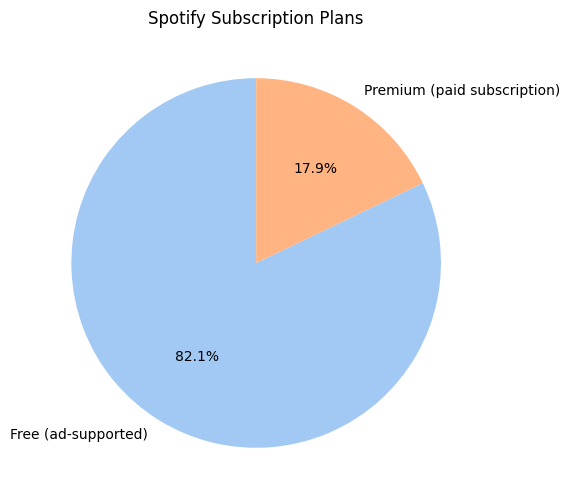

C:\Users\n3des\AppData\Local\Temp\ipykernel_24080\1587485348.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='spotify_listening_device', data=df_cleaned, order=df_cleaned['spotify_listening_device'].value_counts().index, palette='viridis')


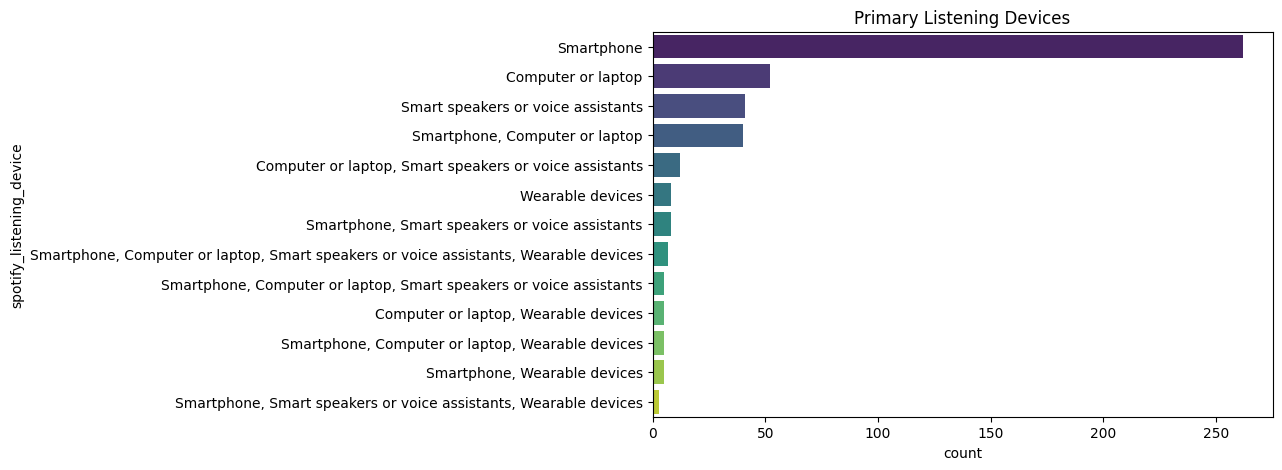

In [13]:
#Age Distribution
plt.figure(figsize=(8,5))
sns.countplot(x='Age', data=df_cleaned, order=df_cleaned['Age'].value_counts().index)
plt.title('Age Group Distribution')
plt.xticks(rotation=45)
plt.show()

# 2. Subscription Types
plt.figure(figsize=(6,6))
df_cleaned['spotify_subscription_plan'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Spotify Subscription Plans')
plt.ylabel('')
plt.show()

# 3. Device Usage
plt.figure(figsize=(8,5))
sns.countplot(y='spotify_listening_device', data=df_cleaned, order=df_cleaned['spotify_listening_device'].value_counts().index, palette='viridis')
plt.title('Primary Listening Devices')
plt.show()

In [14]:
# Document descriptive statistics for all variables
print("Descriptive Statistics for Categorical Variables:\n")
categorical_stats = df_cleaned.describe(include='object')
print(categorical_stats)

Descriptive Statistics for Categorical Variables:

          Age  Gender spotify_usage_period spotify_listening_device  \
count     453     453                  453                      453   
unique      3       3                    4                       13   
top     20-35  Female    More than 2 years               Smartphone   
freq      365     347                  136                      262   

       spotify_subscription_plan premium_sub_willingness  \
count                        453                     453   
unique                         2                       2   
top          Free (ad-supported)                      No   
freq                         372                     290   

       preffered_premium_plan preferred_listening_content fav_music_genre  \
count                     453                         453             453   
unique                      5                           2               6   
top                   Unknown                       Music    